# Preprocessing Twitter Data for Topic Modeling

## Introduction 
Before applying any topic modeling algorithms, it is crucial to properly preprocess the data to ensure optimal results. This notebook preprocesses the Twitter data that was collected in the previous notebook.

Overall, the preprocessing steps include:

* Removing URLs, usernames, and hashtags
* Remove special characters
* Converting all text to lowercase
* Removing stop words, short words
* Lemmatizing words

Once the data has been preprocessed, it is exported to a pickle file in order to be used later for topic modeling.

## Preprocessing Tasks

To begin, we need to import the required libraries and packages that will aid us in performing data preprocessing. We make use of specific packages from gensim, spacy, and nltk for somw preprocessing tasks.

In [4]:
# Import packages
import re
import pandas as pd
import pickle

# ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# data preprocessing packages
from gensim.parsing.preprocessing import strip_multiple_whitespaces, remove_stopwords, strip_short
from nltk.corpus import stopwords
import spacy
import en_core_web_sm
from nltk.tokenize import word_tokenize

# word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Load Data

We load the tweets data that was previously collected and saved in a pickle file.

In [5]:
# load all tweeets data from a pk file
df = pd.read_pickle("pickle_files/all_tweets.pkl")
df

,user_id,user_name,date,text,tweet_id,is_reply,replies,retweets,quotes
0,72579390,innoget,Mon Feb 29 11:23:20 +0000 2016,"RT @PRUAB: 3,2M€ #GrantCall per a projectes #c...",704265693152337921,False,0,1,0
1,72579390,innoget,Fri Feb 26 11:35:21 +0000 2016,#Global #Biotech Reagents Market 2016 Industry...,703181551727570944,False,0,0,0
2,72579390,innoget,Thu Feb 25 10:15:16 +0000 2016,Tech Transfer Office in #Ohio #University help...,702799011187658752,False,0,0,0
3,72579390,innoget,Wed Feb 24 12:10:05 +0000 2016,What’s your point regarding IP protection? Doe...,702465520109559808,False,0,0,0
4,72579390,innoget,Tue Feb 23 15:15:17 +0000 2016,New article about #Samsung and its investment ...,702149739492597761,False,0,0,0
...,...,...,...,...,...,...,...,...,...
4979,72579390,innoget,Tue May 17 20:25:37 +0000 2016,RT @harilaosv: A Hands-Off Approach to #OpenIn...,732668416016945153,False,0,2,0
4980,72579390,innoget,Wed Apr 27 08:04:02 +0000 2016,@innoget is attending the Open Innovation Summ...,725234035593744384,False,0,1,0
4981,72579390,innoget,Tue Mar 29 12:08:13 +0000 2016,RT @BIOFIT_EVENT: Welcome to #BioFIT2016 new s...,714786234791542785,False,0,2,0
4982,72579390,innoget,Mon Mar 21 08:25:54 +0000 2016,IoT Development Enters the Open Innovation Cra...,711831185161375744,False,0,0,0


The file contains 4,984 tweets. Some of these tweets start with "RT", which indicates that they are retweets. Retweets are essentially copies of tweets that have been posted by other users. By excluding retweets, we can eliminate duplicated content and focus solely on original tweets generated by competitors.

In [6]:
# remove retweets
df = df[~df['text'].str.startswith("RT")].reset_index(drop=True)
df

,user_id,user_name,date,text,tweet_id,is_reply,replies,retweets,quotes
0,72579390,innoget,Fri Feb 26 11:35:21 +0000 2016,#Global #Biotech Reagents Market 2016 Industry...,703181551727570944,False,0,0,0
1,72579390,innoget,Thu Feb 25 10:15:16 +0000 2016,Tech Transfer Office in #Ohio #University help...,702799011187658752,False,0,0,0
2,72579390,innoget,Wed Feb 24 12:10:05 +0000 2016,What’s your point regarding IP protection? Doe...,702465520109559808,False,0,0,0
3,72579390,innoget,Tue Feb 23 15:15:17 +0000 2016,New article about #Samsung and its investment ...,702149739492597761,False,0,0,0
4,72579390,innoget,Mon Feb 22 12:01:04 +0000 2016,Want to success in Tech Transfer? Visit our bl...,701738474878144513,False,0,0,0
...,...,...,...,...,...,...,...,...,...
4326,72579390,innoget,Thu Jun 16 09:42:40 +0000 2016,#Science2society starts to boost #innovation e...,743378248818638848,False,0,5,0
4327,72579390,innoget,Mon Jun 13 10:08:17 +0000 2016,#Science2society starts to boost innovation ef...,742297531594465280,False,0,3,0
4328,72579390,innoget,Wed Apr 27 08:04:02 +0000 2016,@innoget is attending the Open Innovation Summ...,725234035593744384,False,0,1,0
4329,72579390,innoget,Mon Mar 21 08:25:54 +0000 2016,IoT Development Enters the Open Innovation Cra...,711831185161375744,False,0,0,0


We observed a consistent pattern in the tweets from MomentiveAI, specifically the inclusion of the string "#TheDailyData - - more about this research + the URL to their website." Given careful consideration, we opted to exclude these tweets from our analysis. This decision was based on our understanding that this pattern likely serves as a template for referencing MomentiveAI's published papers on their website. Since our objective is to conduct topic modeling and concentrate on the substantive text within the tweets, removing these template-like tweets helps ensure the integrity of our analysis.

In [7]:
df[df['text'].str.startswith("#TheDailyData")][['user_name','text']]

,user_name,text
1393,MomentiveAI,#TheDailyData - more about this research here:...
1397,MomentiveAI,#TheDailyData - more about this research here:...
1399,MomentiveAI,#TheDailyData - more about this research here:...
1401,MomentiveAI,#TheDailyData - more about this research here:...
1403,MomentiveAI,#TheDailyData - more about this #EmployeeExper...
...,...,...
2317,MomentiveAI,#TheDailyData - more about this research here:...
2322,MomentiveAI,#TheDailyData - more about this @nytimes resea...
2326,MomentiveAI,#TheDailyData - more about this @CNBC research...
2329,MomentiveAI,#TheDailyData - more about this research here:...


In [8]:
# remove the recurring pattern tweets
df = df[~df['text'].str.startswith("#TheDailyData")].reset_index(drop=True)
df

,user_id,user_name,date,text,tweet_id,is_reply,replies,retweets,quotes
0,72579390,innoget,Fri Feb 26 11:35:21 +0000 2016,#Global #Biotech Reagents Market 2016 Industry...,703181551727570944,False,0,0,0
1,72579390,innoget,Thu Feb 25 10:15:16 +0000 2016,Tech Transfer Office in #Ohio #University help...,702799011187658752,False,0,0,0
2,72579390,innoget,Wed Feb 24 12:10:05 +0000 2016,What’s your point regarding IP protection? Doe...,702465520109559808,False,0,0,0
3,72579390,innoget,Tue Feb 23 15:15:17 +0000 2016,New article about #Samsung and its investment ...,702149739492597761,False,0,0,0
4,72579390,innoget,Mon Feb 22 12:01:04 +0000 2016,Want to success in Tech Transfer? Visit our bl...,701738474878144513,False,0,0,0
...,...,...,...,...,...,...,...,...,...
4201,72579390,innoget,Thu Jun 16 09:42:40 +0000 2016,#Science2society starts to boost #innovation e...,743378248818638848,False,0,5,0
4202,72579390,innoget,Mon Jun 13 10:08:17 +0000 2016,#Science2society starts to boost innovation ef...,742297531594465280,False,0,3,0
4203,72579390,innoget,Wed Apr 27 08:04:02 +0000 2016,@innoget is attending the Open Innovation Summ...,725234035593744384,False,0,1,0
4204,72579390,innoget,Mon Mar 21 08:25:54 +0000 2016,IoT Development Enters the Open Innovation Cra...,711831185161375744,False,0,0,0


### Clean Data

Tweets often contain characters and elements that can cause noise in our model so we need to remove them.

#### Links and emails
Companies often include links to their websites and emails in their tweets to encourage people to visit them. However, these links and emails do not contribute to our topic modeling task, so we will remove them using the `re.sub()` function.

The `re.sub()` function matches regular expressions in text and replaces them with empty string, which means that the elements will be removed from the tweets. We will use the following regular expressions to match links and emails:
* **Email**: `r'[a-zA-Z0-9._%-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,4}'`
* **Link**: `r'https?://\S+'`

#### Hashtags

After analyzing our Twitter data, we discovered that companies tend to use hashtags to reference specific topics or highlight key words within their tweets. Based on this observation, we have made the decision to retain the words associated with hashtags but remove the "#" symbol. Furthermore, we noticed that companies occasionally combine multiple words into a single hashtag. To ensure accurate analysis, we will separate these combined hashtags into individual words. 
Below are some examples:

In [6]:
# print out some examples
print(df.text.iloc[1925])
print("\n")
print(df.text.iloc[1232])
print("\n")
print(df.text.iloc[1880])

Forests reduce #CO2, but they also create cloud cover. Mid-latitude #reforestation may work better than previously thought to slow #ClimateChange!

https://t.co/hAKEUqJUBz https://t.co/9vIErXD1j8


“More #innovative companies developed new ways of #connecting remote workers together to build and sustain the cross-functional, inter-term ties necessary for #innovation, thus widening the pools of minds that could generate new #ideas.”  https://t.co/4VXW1HIZhl


Researchers have developed a new #water #sensor inspired by camel snoots that may even be used for touch-free #ComputerInterfaces

https://t.co/B07QLeqzLw https://t.co/rB6DIPpLYf


**Method:**
We will expand hashtags within tweets by separating them into individual words. Firstly, we use the `separate_hashtags` function processes an entire tweet and identifies hashtags within it. It uses regular expressions to find all hashtags in the provided string. For each identified hashtag, it calls the `separate_hashtag_word(tag)` function to separate and expand the words within the hashtag. The function then replaces the original hashtag with the expanded version in the tweet. Finally, the modified tweet is returned. If no words are found, the original hashtag is returned as is.

In [9]:
def separate_hashtag_word(tag):
    # find words starting with a capital letter followed by zero or more lowercase letters
    res = re.findall('[A-Z][a-z]*', tag[1:])
    # join the words with a space if found, or return the tweet as is
    return ' '.join(res) if res else tag[1:]

def separate_hashtags(tweet):
    # find all hashtags in the middle of the string
    if tweet:
        res = re.findall(r'#\w+', tweet)
        for tag in res:
            # separate hashtag words
            expanded_tag = separate_hashtag_word(tag)
            tweet = tweet.replace(tag, expanded_tag)
        return tweet
    else:
        return tweet

#### Stopwords
During the stop word removal step, stop words were eliminated from the text using the nltk library's standard stop word list. Furthermore, additional words, including company names, campaign name and call-to-action terms such as "click," "tap," "subscribe," and "here," were also removed.

In [10]:
stop = set(stopwords.words("english"))
nltk_stopwords = set(stopwords.words("english"))

# extra words to remove
excluded_words = ['click', 'tap', 'learn', 'discover', 'join', 'subscribe', 'share', 'comment', 'retweet', 'follow', 'read', 'register','check','call','view','sign','link','team','next','amp'
,'us', 'innoget', 'yetcom', 'inpart', 'momentiveai','wazoku','ninesigma', 'amp','blog','article','momentive','yet','yet2com','datum','opioid','openinnovation']

# update stop word list
nltk_stopwords.update(excluded_words)

#### Non-Alphabet Character, Short Word, and Multiple Space Removal
* Non-Alphabet Character Removal: remove  non-alphabet characters from the text, such as punctuation marks, special symbols, and numbers. 
* Short Word Removal: short words are filtered out from the text. We utilize the `strip_short` function from the `gensim` library
* Multiple Space Removal: eliminate multiple consecutive spaces within the text.
* Lowercasing: convert all text to lowercase.

#### Lemmatization
Finally, we perform lemmatization on the text data. By applying lemmatization, words are transformed to their canonical form, which aids in standardizing and simplifying the text.

In [11]:
nlp = spacy.load('en_core_web_sm')
def lemmatize_text(tweet):
    doc = nlp(tweet)
    lemmatized_tweet = ' '.join([token.lemma_ for token in doc])
    return lemmatized_tweet

**All the cleaning tasks are combined into one function**

In [12]:
def clean_tweet(tweet):
    try:
        clean_tweet = re.sub(r'[a-zA-Z0-9._%-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,4}', '', tweet)  # remove email addresses
        clean_tweet = re.sub(r'https?://\S+', '', clean_tweet)  # remove hyperlinks
        clean_tweet = re.sub(r'@\w+', '', clean_tweet)  # remove mentions
        clean_tweet = separate_hashtags(clean_tweet)  # remove the hash symbols for hashtags in the middle of text
        clean_tweet = re.sub("[^a-zA-Z]+", " ", clean_tweet)  # remove non-alphabetic characters
        clean_tweet = strip_multiple_whitespaces(clean_tweet) # remove multiple spaces
        clean_tweet = clean_tweet.lower()  # convert all to lowercase
        clean_tweet = remove_stopwords(clean_tweet, stopwords=nltk_stopwords) # remove stop words
        clean_tweet = strip_short(clean_tweet) # strip short word
        clean_tweet = lemmatize_text(clean_tweet) # lemmatization
        return clean_tweet.strip()
    except:
        print("error: ", clean_tweet)

In [13]:
df['cleaned_text'] = [clean_tweet(tweet) for tweet in df['text']]

In [14]:
df

,user_id,user_name,date,text,tweet_id,is_reply,replies,retweets,quotes,cleaned_text
0,72579390,innoget,Fri Feb 26 11:35:21 +0000 2016,#Global #Biotech Reagents Market 2016 Industry...,703181551727570944,False,0,0,0,global biotech reagent market industry share r...
1,72579390,innoget,Thu Feb 25 10:15:16 +0000 2016,Tech Transfer Office in #Ohio #University help...,702799011187658752,False,0,0,0,tech transfer office ohio university help staf...
2,72579390,innoget,Wed Feb 24 12:10:05 +0000 2016,What’s your point regarding IP protection? Doe...,702465520109559808,False,0,0,0,point regard protection benefit market new pro...
3,72579390,innoget,Tue Feb 23 15:15:17 +0000 2016,New article about #Samsung and its investment ...,702149739492597761,False,0,0,0,new samsung investment biotechnology aim becom...
4,72579390,innoget,Mon Feb 22 12:01:04 +0000 2016,Want to success in Tech Transfer? Visit our bl...,701738474878144513,False,0,0,0,want success tech transfer visit new ten step ...
...,...,...,...,...,...,...,...,...,...,...
4201,72579390,innoget,Thu Jun 16 09:42:40 +0000 2016,#Science2society starts to boost #innovation e...,743378248818638848,False,0,5,0,science start boost innovation efficiency acro...
4202,72579390,innoget,Mon Jun 13 10:08:17 +0000 2016,#Science2society starts to boost innovation ef...,742297531594465280,False,0,3,0,science start boost innovation efficiency acro...
4203,72579390,innoget,Wed Apr 27 08:04:02 +0000 2016,@innoget is attending the Open Innovation Summ...,725234035593744384,False,0,1,0,attend open innovation summit london hold open...
4204,72579390,innoget,Mon Mar 21 08:25:54 +0000 2016,IoT Development Enters the Open Innovation Cra...,711831185161375744,False,0,0,0,iot development enter open innovation craze


#### Remove empty strings after cleaning tasks

After performing the cleaning steps, some tweets result in empty or null text because they contain only links or mentions in their tweet. We will remove these empty tweets from the dataset.

In [15]:
# check the records null
df[df['cleaned_text']==''][['text', 'cleaned_text']]

,text,cleaned_text
358,@PraxisAuril @astp4KT @inova_io @Labiotech_e...,
369,"@PraxisAuril @astp4KT , @inova_io @Labiotech_e...",
1434,https://t.co/odvEBg9uzj,
1435,https://t.co/xDgkahKNGL,
1436,https://t.co/3zfsRTwdyD,
...,...,...
3455,https://t.co/WiIFdhpx24,
3458,https://t.co/cWs2dI3tz9,
3459,https://t.co/5etzOnwy32,
3460,https://t.co/r3mx1LMtEs,


In [16]:
# drop all empty
df = df[df['cleaned_text'] != '']

In [17]:
df[['text','cleaned_text']]

,text,cleaned_text
0,#Global #Biotech Reagents Market 2016 Industry...,global biotech reagent market industry share r...
1,Tech Transfer Office in #Ohio #University help...,tech transfer office ohio university help staf...
2,What’s your point regarding IP protection? Doe...,point regard protection benefit market new pro...
3,New article about #Samsung and its investment ...,new samsung investment biotechnology aim becom...
4,Want to success in Tech Transfer? Visit our bl...,want success tech transfer visit new ten step ...
...,...,...
4201,#Science2society starts to boost #innovation e...,science start boost innovation efficiency acro...
4202,#Science2society starts to boost innovation ef...,science start boost innovation efficiency acro...
4203,@innoget is attending the Open Innovation Summ...,attend open innovation summit london hold open...
4204,IoT Development Enters the Open Innovation Cra...,iot development enter open innovation craze


We will visualize the cleaned text in a word cloud to see if the dataset is clean enough. By visualizing the cleaned text in a word cloud, we can get a quick overview of the most common words in the dataset. This can help us to identify any potential problems with the dataset, such as the presence of stop words or noise.

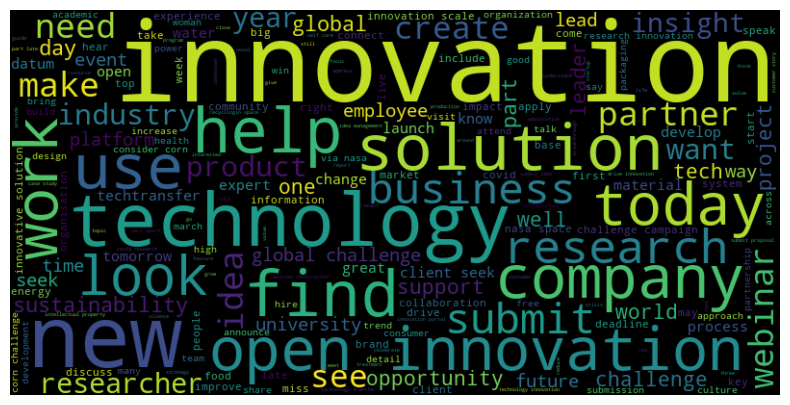

In [18]:
# draw word cloud
all_words = ' '.join([text for text in df['cleaned_text']]) 
wordcloud = WordCloud(width=800, height=400, random_state=3).generate(all_words) 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

The preprocessed dataset is exported as both a pkl and CSV file for future use. This enables easy access and utilization of the preprocessed data in subsequent modeling and analysis tasks.

In [19]:
# export to pickle
df.to_pickle("pickle_files/preprocessed_dataset.pkl")
print("DataFrames exported successfully.")

DataFrames exported successfully.


In [20]:
# export to CSV
df.to_csv("csv_files/preprocessed_dataset.csv", index=False)
print("DataFrames exported successfully.")

DataFrames exported successfully.


### Final Result

After completing all the preprocessing steps, the resulting dataset consists of 4,131 tweets.